In [12]:
import os,sys
import numpy as np
import pandas as pd
import ibmseti
import collections
import scipy.io
import matplotlib.pyplot as plt
import commonutils as cu
import PIL
from PIL import Image

In [13]:
import keras
from keras import backend as K
K.set_image_dim_ordering('tf')
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

In [3]:
### Loading saved npy files
# Loading in saved subset of data files 
subsetComplexSignals = np.load('complexSignalsSubset.npy')[()]
subsetSpectrograms = np.load('specSubset.npy')[()]

In [4]:
def showImageFromSpec(spec,imsize,binFactor,save=False,filename=None):
    specShape = spec.shape
    spec = cu.nputils.bin_ndarray(spec[1:,:],(specShape[0]-1,specShape[1]/binFactor),operation='average')
    dpi = 96.0
    fig = plt.figure(frameon=False,figsize=(imsize[0]/dpi,imsize[1]/dpi))
    ax = plt.Axes(fig,[0.,0.,1.,1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    # fig, ax = plt.subplots(figsize=(20, 10))
    # ax.imshow(np.log(spec), aspect = 0.5*float(spec.shape[1]) / spec.shape[0])
    ax.imshow(np.log(spec), aspect = 'auto')
    plt.show()

In [5]:
spec = subsetSpectrograms['squiggle'][1]

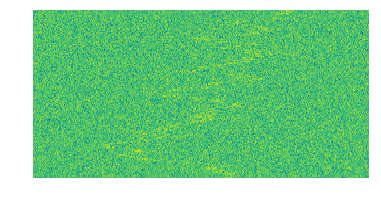

In [6]:
showImageFromSpec(spec,(448,224),2,save=True,filename="resized_spec")

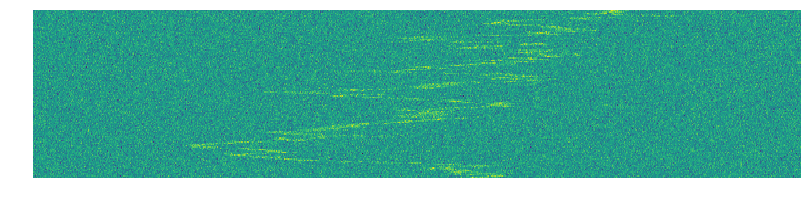

In [7]:
showImageFromSpec(spec,(1024,224),6,save=True,filename="resized_spec")

In [8]:
spec.dtype

dtype('float64')

In [9]:
from skimage import data
from skimage import filters

In [10]:
val = filters.threshold_otsu(spec)
mask = spec < 30

In [11]:
spec.shape

(129, 6144)

In [13]:
import cv2

In [17]:
img = cv2.imread('sampleImages_small_size/squiggle_5.jpg',0)

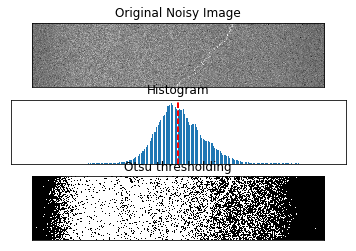

In [38]:
img = cv2.imread('sampleImages_small_size/squiggle_5.jpg',0)
 
#ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
 
#ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
blur = cv2.GaussianBlur(img, (5,5), 0)
ret, imgf = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
plt.subplot(3,1,1), plt.imshow(img,cmap = 'gray')
plt.title('Original Noisy Image'), plt.xticks([]), plt.yticks([])
plt.subplot(3,1,2), plt.hist(img.ravel(), 256)
plt.axvline(x=ret, color='r', linestyle='dashed', linewidth=2)
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.subplot(3,1,3), plt.imshow(imgf,cmap = 'gray')
plt.title('Otsu thresholding'), plt.xticks([]), plt.yticks([])
plt.show()

In [39]:
# define the list of boundaries
boundaries = [
	([17, 15, 100], [50, 56, 200]),
	([86, 31, 4], [220, 88, 50]),
	([25, 146, 190], [62, 174, 250]),
	([103, 86, 65], [145, 133, 128])
]

In [40]:
# loop over the boundaries
for (lower, upper) in boundaries:
	# create NumPy arrays from the boundaries
	lower = np.array(lower, dtype = "uint8")
	upper = np.array(upper, dtype = "uint8")
 
	# find the colors within the specified boundaries and apply
	# the mask
	mask = cv2.inRange(img, lower, upper)
	output = cv2.bitwise_and(img, img, mask = mask)
 
	# show the images
	cv2.imshow("images", np.hstack([img, output]))
	cv2.waitKey(0)

error: /opt/conda/conda-bld/opencv_1491943414359/work/opencv-3.1.0/modules/core/src/arithm.cpp:1906: error: (-209) The lower bounary is neither an array of the same size and same type as src, nor a scalar in function inRange
